Selle notebookiga teeb proovi natuke teise lähenemisega.
Kontrollideks on nüüd pea kallutamine vasakule ja paremale ning power move-i aktiveerimiseks peab naeratama.
Pea kallet saab mõõta, kui tuvastada silmad ja nende vahelt tõmmatud joone kallet mõõta. Naeratust oleks vaja lihtsalt tuvastada, kas on olemas või ei ole.

Kasutatud on praktikumi materjale.


Naeratuse tuvastamine oli kehv, sest andis palju vale positiivseid. Seetõttu "power" käsk läheb käiku nüüd, kui pildi pealt nägu ei tuvastata. Ehk siis pead näo kaamera eest korraks ära võtma või palju kallutama kummalegi poole. Suure kalde all ei tuvastata nägu ära.

In [1]:
import cv2 as cv
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import copy
import math

In [2]:
def näitaPilti(pilt):
    #lokaalselt parema kvalliga
    #cv.imshow('Test pilt', pilt) 
    #cv.waitKey(0)
    #cv.destroyAllWindows()
    
    #cv2_imshow(img) #colabi jaoks
    
    plt.subplot(111),plt.imshow(pilt),plt.title('Pilt')
    plt.show()

In [3]:
testPildid = []

i = 1
while True:
    try:
        p = cv.imread(f"fbi_picture{i}.png")
        len(p) #viskab errori kui pilti ei ole
        testPildid.append(p)
        i += 1
    except:
        break

In [4]:
face_cascade = cv.CascadeClassifier("haarcascade_frontalface_default.xml")
eye_cascade = cv.CascadeClassifier("haarcascade_eye.xml")
smile_cascade = cv.CascadeClassifier('haarcascade_smile.xml') 

In [5]:
def teostaTuvastus(img):
    koopia = img.copy() 
    gray = cv.cvtColor(koopia, cv.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
   
    eyes = []
    smiles = []
    for (x, y, w, h) in faces:
        cv.rectangle(koopia, (x, y), (x+w, y+h), (0, 0, 255), 2)
        roi_gray = gray[y:y + h, x : x + h]
        roi_color = koopia[y:y + h, x : x + h]
     
        eyes = eye_cascade.detectMultiScale(roi_gray)
        for (ex, ey, ew, eh) in eyes:
            cv.rectangle(roi_color, (ex, ey), (ex+ew, ey+eh), (0, 255, 255), 2)
            
        smiles = smile_cascade.detectMultiScale(roi_gray, 1.8, 20) 
        for (sx, sy, sw, sh) in smiles: 
            cv.rectangle(roi_color, (sx, sy), ((sx + sw), (sy + sh)), (0, 0, 255), 2) 
            
    
    print(f"Silmi {len(eyes)}")
    print(f"Naeratusi {len(smiles)}")
    print("Silmade andmed:")
    for s in eyes:
        print(s)

    näitaPilti(koopia)

Pilt 0:
Silmi 2
Naeratusi 0
Silmade andmed:
[122  58  49  49]
[37 56 53 53]


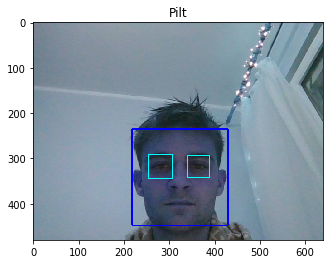

Pilt 1:
Silmi 2
Naeratusi 1
Silmade andmed:
[132  60  45  45]
[40 57 54 54]


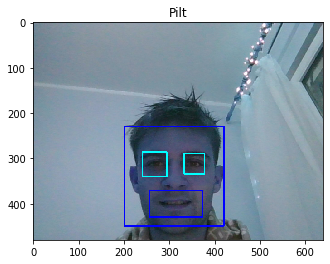

Pilt 2:
Silmi 0
Naeratusi 0
Silmade andmed:


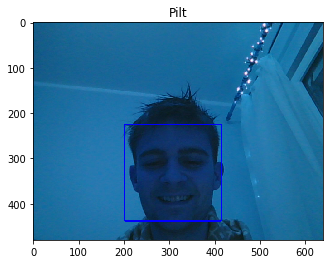

Pilt 3:
Silmi 1
Naeratusi 1
Silmade andmed:
[120  55  61  61]


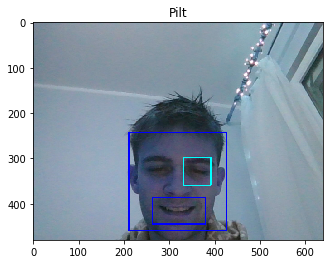

Pilt 4:
Silmi 2
Naeratusi 0
Silmade andmed:
[113  43  54  54]
[46 76 50 50]


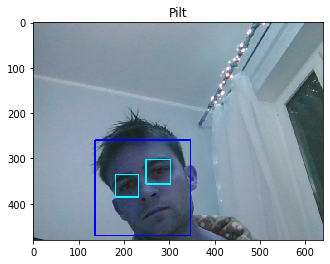

Pilt 5:
Silmi 0
Naeratusi 0
Silmade andmed:


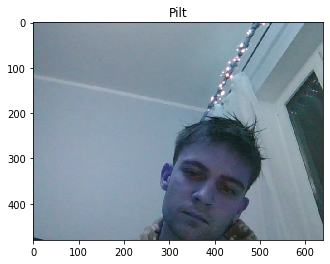

Pilt 6:
Silmi 0
Naeratusi 0
Silmade andmed:


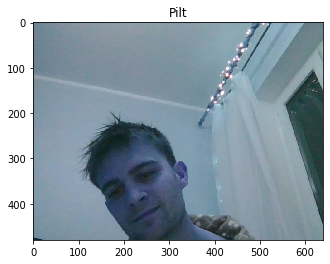

Pilt 7:
Silmi 0
Naeratusi 0
Silmade andmed:


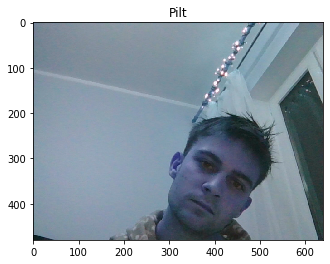

Pilt 8:
Silmi 2
Naeratusi 0
Silmade andmed:
[46 44 43 43]
[113  65  48  48]


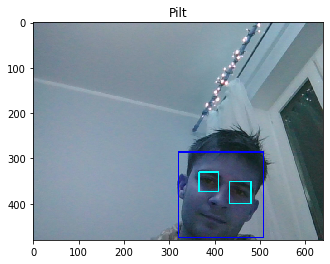

Pilt 9:
Silmi 2
Naeratusi 0
Silmade andmed:
[33 59 52 52]
[121  52  52  52]


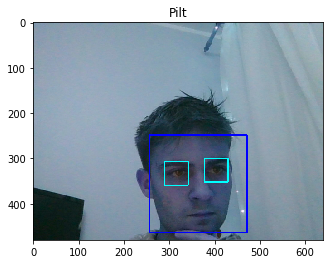

In [6]:
for i, img in enumerate(testPildid):
    print(f"Pilt {i}:")
    teostaTuvastus(img)

In [7]:
"""
    Tagastus listina võimalikest väärtustest:
    'vasak'
    'parem'
    'power'
"""
def ennusta(img):
    koopia = img.copy() 
    gray = cv.cvtColor(koopia, cv.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
   
    eyes = []
    smiles = []
    for (x, y, w, h) in faces:
        cv.rectangle(koopia, (x, y), (x+w, y+h), (0, 0, 255), 2)
        roi_gray = gray[y:y + h, x : x + h]
        roi_color = koopia[y:y + h, x : x + h]
        eyes = eye_cascade.detectMultiScale(roi_gray)   
        smiles = smile_cascade.detectMultiScale(roi_gray, 1.8, 20)
    
    vastused = []
    if len(smiles) == 1:
        vastused.append("power")
    
    if len(eyes) == 2:
        #silmade koordinaadid x,y (tuvastuse keskpunkt)
        kesk1 = (eyes[0][0] + int(eyes[0][2] / 2), eyes[0][1] + int(eyes[0][3] / 2))
        kesk2 = (eyes[1][0] + int(eyes[1][2] / 2), eyes[1][1] + int(eyes[1][3] / 2))
        
        if (kesk1[0] < kesk2[0]):
            vasak = kesk1
            parem = kesk2
        else:
            vasak = kesk2
            parem = kesk1
            
        tolerants = 20
        vahe = vasak[1] - parem[1]

            
        if vahe > tolerants:
            vastused.append("paremale")
        if vahe < -tolerants:
            vastused.append("vasakule")
    return vastused

In [8]:
for i, img in enumerate(testPildid):
    print(f"Pilt {i}:")
    print(ennusta(img))
    print()

Pilt 0:
[]

Pilt 1:
['power']

Pilt 2:
[]

Pilt 3:
['power']

Pilt 4:
['paremale']

Pilt 5:
[]

Pilt 6:
[]

Pilt 7:
[]

Pilt 8:
['vasakule']

Pilt 9:
[]

